# Información Mutua

## Caso de uso: Automóviles Modelo 1985*

El conjunto de datos de automóviles consta de 193 automóviles del año modelo 1985. 


## Objetivo

Predecir el precio de un automóvil a partir de las características del automóvil, como la marca, el body_style y la potencia usando el método de mutual information. 

En este ejemplo, se clasificarán las características con información mutua e revisarán los resultados mediante visualización de datos.

## Importación de las bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

from sklearn.feature_selection import mutual_info_regression

## Extracción de datos

In [ ]:
df = pd.read_csv("autos.csv")
df.head()

symboling         make fuel_type aspiration  num_of_doors   body_style  \
0          3  alfa-romero       gas        std             2  convertible   
1          3  alfa-romero       gas        std             2  convertible   
2          1  alfa-romero       gas        std             2    hatchback   
3          2         audi       gas        std             4        sedan   
4          2         audi       gas        std             4        sedan   

  drive_wheels engine_location  wheel_base  length  ...  engine_size  \
0          rwd           front        88.6   168.8  ...          130   
1          rwd           front        88.6   168.8  ...          130   
2          rwd           front        94.5   171.2  ...          152   
3          fwd           front        99.8   176.6  ...          109   
4          4wd           front        99.4   176.6  ...          136   

   fuel_system  bore stroke  compression_ratio  horsepower peak_rpm  city_mpg  \
0         mpfi  3.47   2.68                  9         111     5000        21   
1         mpfi  3.47   2.68                  9         111     5000        21   
2         mpfi  2.68   3.47                  9         154     5000        19   
3         mpfi  3.19   3.40                 10         102     5500        24   
4         mpfi  3.19   3.40                  8         115     5500        18   

   highway_mpg  price  
0           27  13495  
1           27  16500  
2           26  16500  
3           30  13950  
4           22  17450  

[5 rows x 25 columns]

## Preprocesamiento

### Separando características y las etiquetas


In [ ]:
X = df.copy()
y = X.pop("price")

### Codificando las características de variable continua y las variable discreta

El algoritmo scikit-learn para MI trata las características discretas de manera diferente a las características continuas. 

En consecuencia, debe decirle cuáles son cuáles. Como regla general, cualquier cosa que deba tener un  tipo flotante no es  discreta. 

Los del tipo categóricos (objeto o  tipo dtype categorial que es un término de la biblioteca de pandas) se pueden tratar como discretos dándoles una codificación de etiqueta.

In [ ]:
# Codifica etiquetas a las columnas que no son numéricas. Por ejemplo las que tienen texto
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# Es un marcado o bandera para señalar cual columna tiene información discreta.
# Es importante paso. Asegurese de tenerla
discrete_features = X.dtypes == int

Scikit-learn tiene dos métricas de información mutua en su módulo de feature_selection: 

- objetivos de valor real (mutual_info_regression)
- objetivos categóricos (mutual_info_classif). 

Nuestro objetivo, el precio, tiene un valor real, por lo tanto se usa mutual_info_regression. 

La siguiente celda calcula las puntuaciones de MI para nuestras características y las envuelve la información ordenando de mayor a menor.



## Obtención de la Mutual Information

In [ ]:
# obtiene la mutual informacion
mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
# crea una estructura (la pandas series). Es una buena opción para manipular los datos
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
# ordena los datos de mayor a menor
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores  # Muestra los resultados

curb_weight          1.479156
horsepower           1.257375
engine_size          1.004421
highway_mpg          0.954177
city_mpg             0.861321
width                0.687981
length               0.612571
wheel_base           0.584849
make                 0.543738
bore                 0.506610
fuel_system          0.484737
peak_rpm             0.454164
stroke               0.388275
height               0.349166
num_of_cylinders     0.333249
drive_wheels         0.332490
symboling            0.230041
engine_type          0.150524
compression_ratio    0.133787
aspiration           0.087755
body_style           0.081074
fuel_type            0.048139
engine_location      0.036912
num_of_doors         0.012705
Name: MI Scores, dtype: float64

## Visualización

Y ahora un diagrama de barra para facilitar las comparaciones entre los valores de la métrica:

<Figure size 800x500 with 0 Axes>

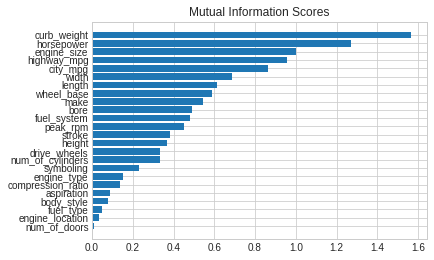

<Figure size 800x500 with 0 Axes>

In [ ]:
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))


La visualización de datos es un gran instrumento para evaluar las características.

Como era de esperar, la característica de curb_weight tiene alta puntuación  exhibe una fuerte relación con  el precio de venta que el objeto del esta estudio.

Graficando se puede observar la relación del precio con el curb_weight (peso del automóvil)

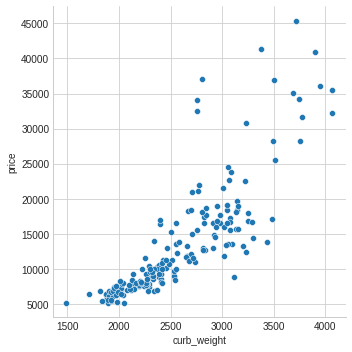

In [ ]:
sns.relplot(x="curb_weight", y="price", data=df)

La característica fuel_type tiene una puntuación multual information bastante baja, pero como se puede ver en la figura, separa claramente dos poblaciones de precios con diferentes tendencias dentro de la  función de caballos de fuerza. Esto indica que fuel_type contribuye a un efecto de interacción y podría no ser poco importante después de todo. 

Antes de decidir que una característica no es importante desde su puntaje de MI, es bueno investigar cualquier posible efecto de interacción: el conocimiento del dominio de negocio (conocimiento del negocio) puede ofrecer mucha orientación aquí.


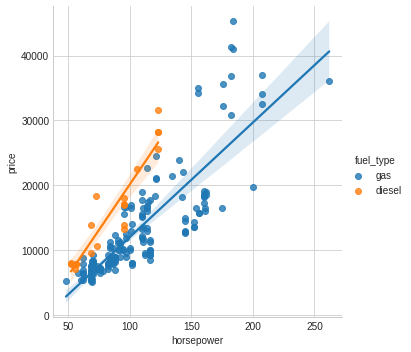

In [ ]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df);

La visualización de datos es una gran adición a su caja de herramientas de ingeniería de características. Junto con las métricas de utilidad como la información mutua, visualizaciones como estas pueden ayudarlo a descubrir relaciones importantes en sus datos.

Por otro lado, relacionar el precio con una característica con una baja Mutual information (MI) puede mostrar que no existe una fuerte relación en el precio respecto con dicha característica.

Por ejemplo:

Caracterizar el precio de un vehículo por el tipo de motor (engine_type) muestra que la característica del motor no ha sido determinante para definir el precio.

<AxesSubplot:xlabel='engine_type', ylabel='price'>

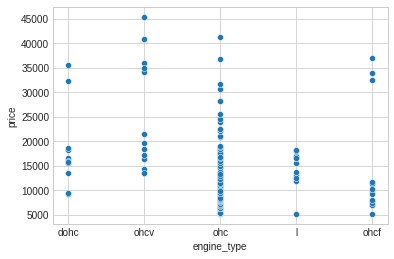

In [ ]:
sns.scatterplot(x='engine_type', y='price', data=df)